In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv("student_mental_health_data.csv")

In [18]:
df.head()

,SleepHours,StudyHours,ScreenTime,SocialActivity,RiskScore
0,7.7,3.4,2.8,2.8,69.5
1,6.8,3.6,4.8,1.1,89.3
2,8.0,4.1,6.0,2.9,79.9
3,9.3,4.1,6.1,3.4,71.2
4,6.6,1.6,5.1,2.4,76.7


In [19]:
df.isnull().sum()

SleepHours        0
StudyHours        0
ScreenTime        0
SocialActivity    0
RiskScore         0
dtype: int64

In [20]:
X=df[['SleepHours', 'StudyHours', 'ScreenTime', 'SocialActivity']]
y=df['RiskScore']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
## Model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
## Coefficient and Intercept
print("Coefficient or slope:",model.coef_)
print("Intercept:",model.intercept_)

Coefficient or slope: [-4.49249286  3.75869091  2.73543296 -4.50632646]
Intercept: 97.25922345341746


In [24]:
y_pred=model.predict(X_test)

In [25]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 1.3795168514605156
Mean Absolute Error: 0.959882301083192
Root Mean Squared Error: 1.17452835276996


In [26]:
# Display R-squared and adjusted R-squared
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("R2 Score:", score)
adj_score=1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 Score:", adj_score)


R2 Score: 0.9881303702947064
Adjusted R2 Score: 0.98677384118553


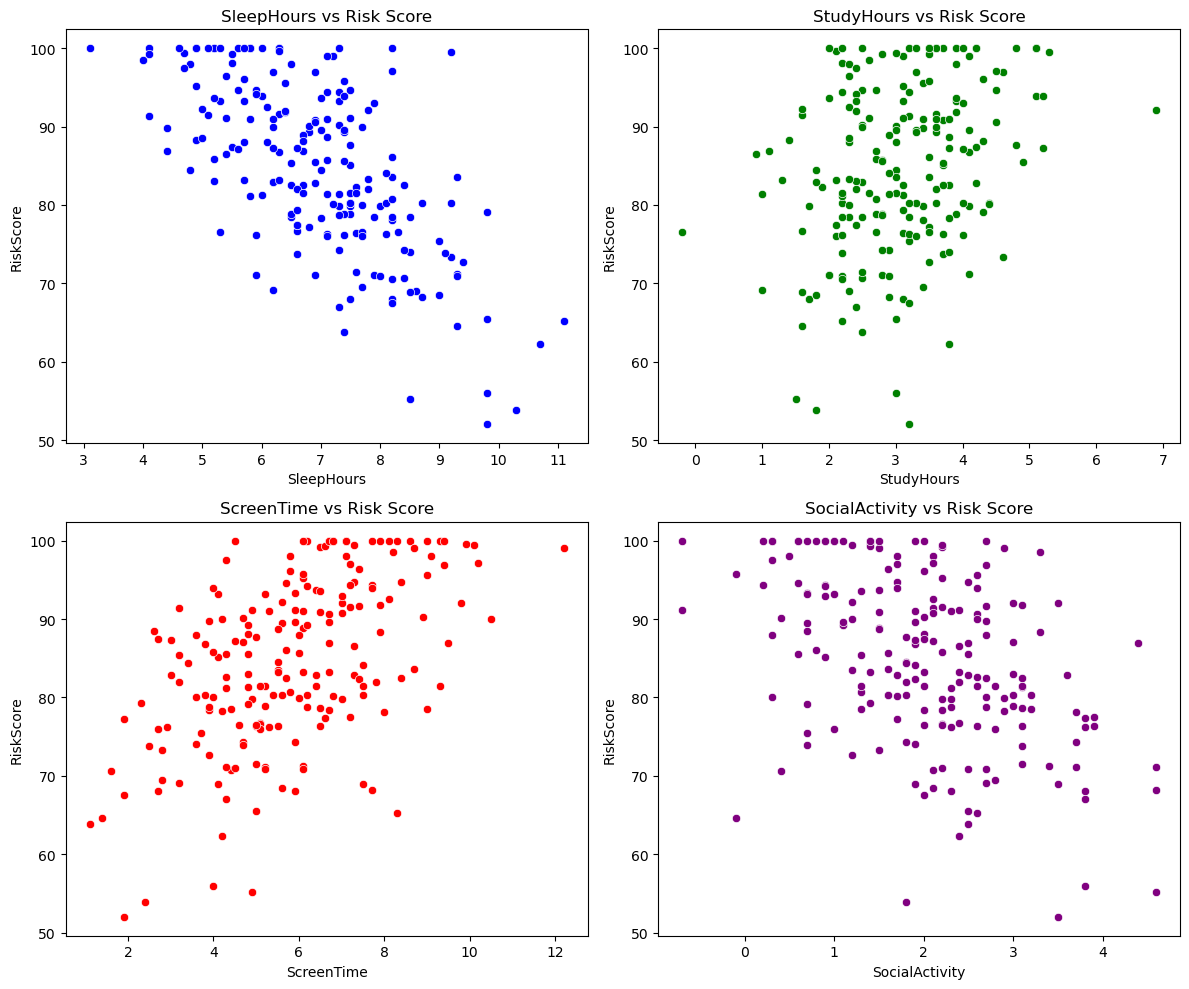

In [27]:
# Scatter plots
plt.figure(figsize=(12, 10))
features = ['SleepHours', 'StudyHours', 'ScreenTime', 'SocialActivity']
colors = ['blue', 'green', 'red', 'purple']

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df, x=feature, y='RiskScore', color=colors[i])
    plt.title(f'{feature} vs Risk Score')

plt.tight_layout()
plt.show()

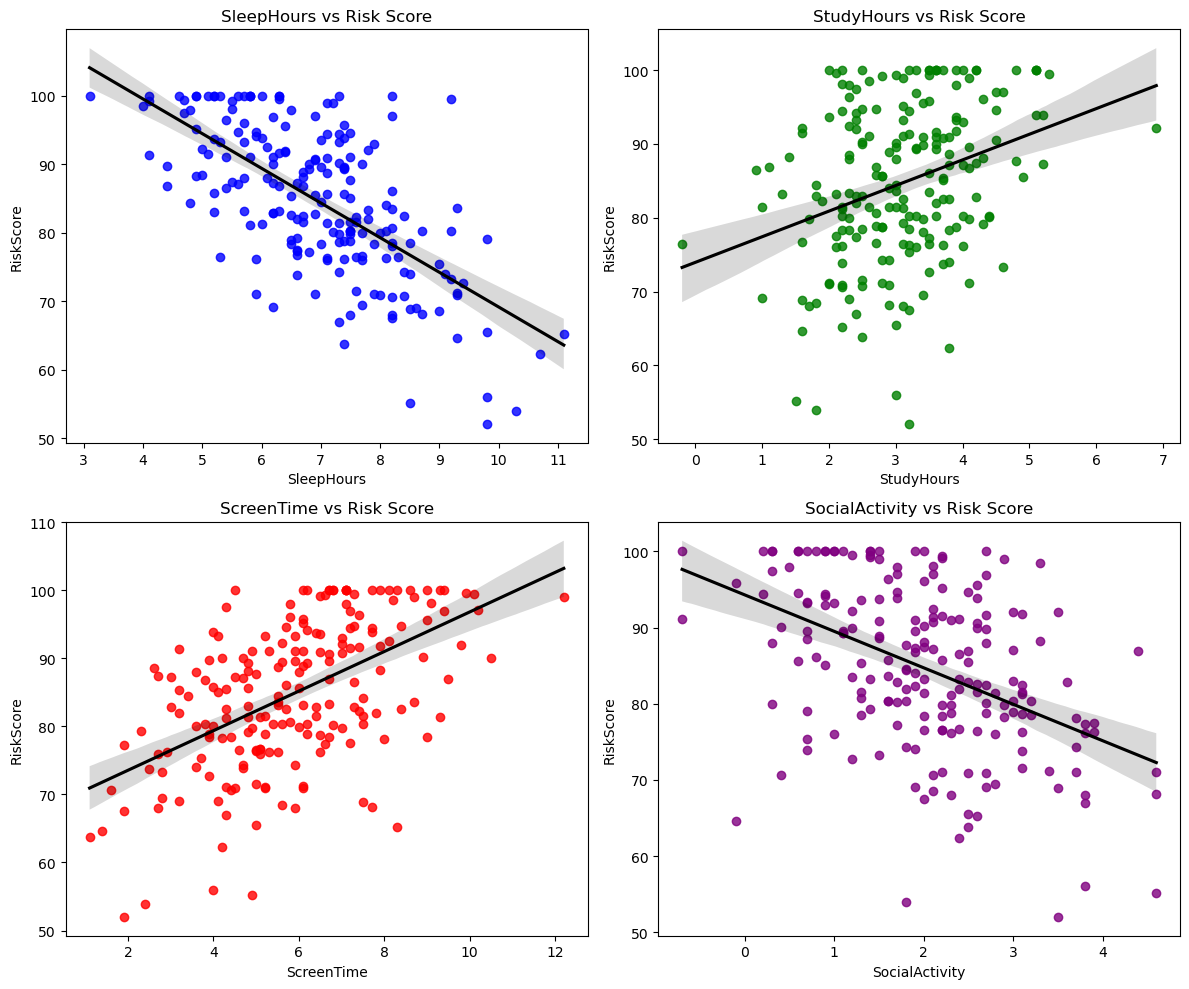

In [28]:
features = ['SleepHours', 'StudyHours', 'ScreenTime', 'SocialActivity']
colors = ['blue', 'green', 'red', 'purple']

plt.figure(figsize=(12, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    # Draw scatter + best-fit line
    sns.regplot(data=df, x=feature, y='RiskScore', scatter_kws={'color': colors[i]}, line_kws={'color': 'black'})
    plt.title(f'{feature} vs Risk Score')

plt.tight_layout()
plt.show()


In [29]:
df.corr()

,SleepHours,StudyHours,ScreenTime,SocialActivity,RiskScore
SleepHours,1.000000,0.096234,-0.133479,0.068935,-0.657163
StudyHours,0.096234,1.000000,-0.032331,-0.102849,0.318656
ScreenTime,-0.133479,-0.032331,1.000000,0.102646,0.537592
SocialActivity,0.068935,-0.102849,0.102646,1.000000,-0.455013
RiskScore,-0.657163,0.318656,0.537592,-0.455013,1.000000


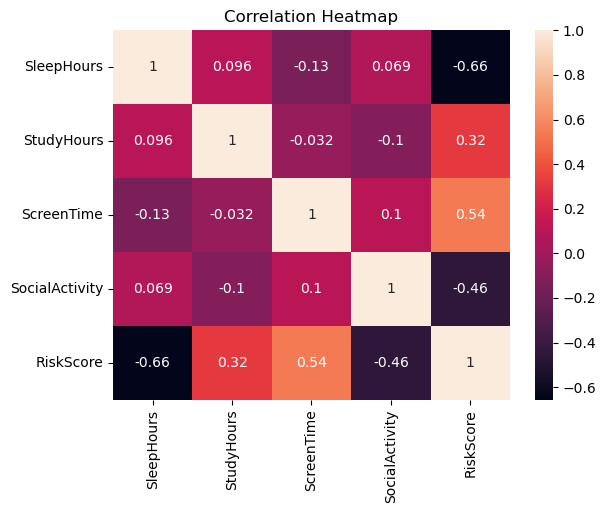

In [30]:
## Correlation Heatmap
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()